In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/dataset_wearther/seattle-weather.csv')

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [9]:
len(training_set)

1461

In [10]:
1461
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [11]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [12]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [14]:
regressor = Sequential()

In [15]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [16]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [18]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 11s 143ms/step - loss: 212.2423 - val_loss: 265.3293
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 101.9608 - val_loss: 182.0801
Epoch 3/100
25/25 [==============================] - 1s 24ms/step - loss: 78.8126 - val_loss: 150.6946
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 68.1871 - val_loss: 130.3664
Epoch 5/100
25/25 [==============================] - 1s 23ms/step - loss: 62.2718 - val_loss: 114.2311
Epoch 6/100
25/25 [==============================] - 1s 26ms/step - loss: 58.7313 - val_loss: 102.9218
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 56.5880 - val_loss: 95.2439
Epoch 8/100
25/25 [==============================] - 1s 25ms/step - loss: 55.7545 - val_loss: 89.8863
Epoch 9/100
25/25 [==============================] - 1s 25ms/step - loss: 53.8691 - val_loss: 84.6826
Epoch 10/100
25/25 [==============================] - 1s 23ms/step - los

In [19]:
his = pd.DataFrame(history.history)

In [20]:
his.head()

,loss,val_loss
0,212.242340,265.329285
1,101.960831,182.080078
2,78.812614,150.694565
3,68.187073,130.366409
4,62.271759,114.231140


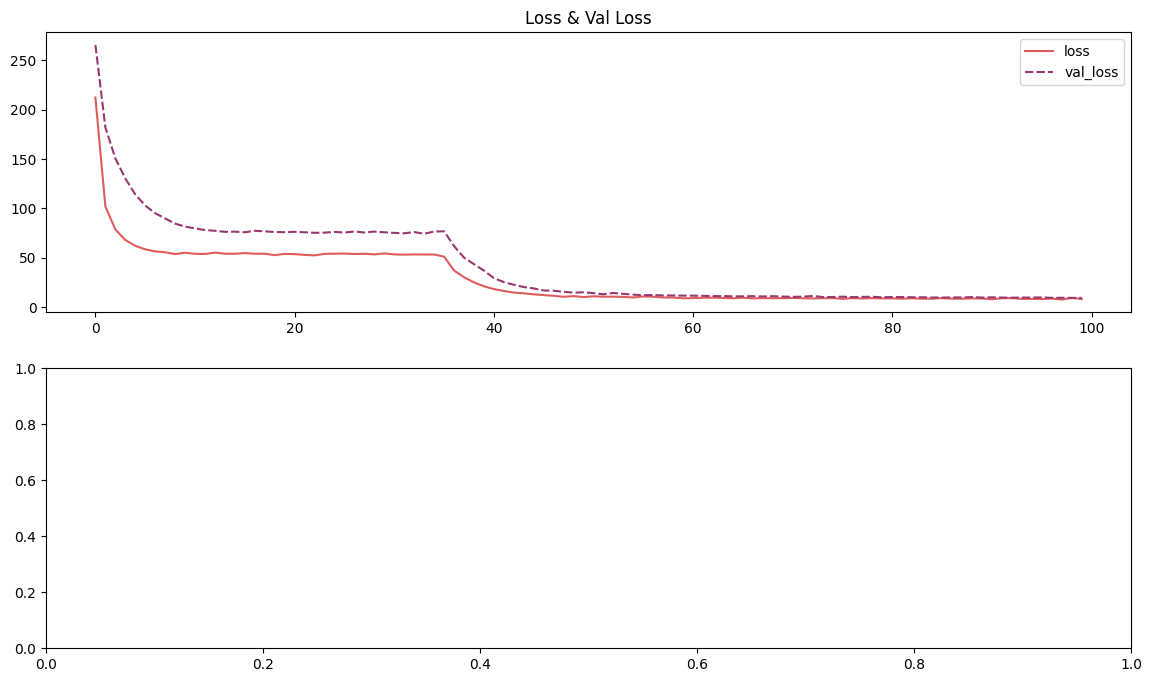

In [21]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

**2ND METHOD:Weather Prediction - Classification (RF)**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
raw_df = pd.read_csv("/content/dataset_wearther/seattle-weather.csv")
df = raw_df
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [24]:
df.drop("date", axis=1, inplace=True)
## We don't need to have date info

In [25]:
df.info()
df.isna().sum().sum()

## There is no empty cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


0

In [26]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**Preparing Data for Classification**

In [27]:
X = df.drop("weather" ,axis=1)
y = df["weather"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**Grid Search and Random Forest**

In [29]:
from sklearn.model_selection import GridSearchCV;
from sklearn.ensemble import RandomForestClassifier

In [30]:
n_est=np.arange(30,60)      ## You can try a wider range but n_est for the best accuracy_score is about 50
max_feat = np.arange(1,10)
bootstrap_sec = [True]
oob = [True, False]

In [31]:
parameters = {
    "n_estimators" : n_est,
    "max_features": max_feat,
    "bootstrap" : bootstrap_sec,
    "oob_score" : oob}

In [32]:
random_forest = RandomForestClassifier()

In [33]:
grid = GridSearchCV(random_forest, parameters, error_score="raise")

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [35]:
grid.best_estimator_, grid.best_params_

(RandomForestClassifier(max_features=1, n_estimators=49, oob_score=True),
 {'bootstrap': True, 'max_features': 1, 'n_estimators': 49, 'oob_score': True})

In [36]:
weather_pred = grid.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

              precision    recall  f1-score   support

     drizzle       0.25      0.14      0.18         7
         fog       0.33      0.13      0.19        23
        rain       0.98      0.88      0.93       130
        snow       0.67      0.50      0.57         4
         sun       0.76      0.95      0.84       129

    accuracy                           0.83       293
   macro avg       0.60      0.52      0.54       293
weighted avg       0.81      0.83      0.81       293
 



<Figure size 2400x1600 with 0 Axes>

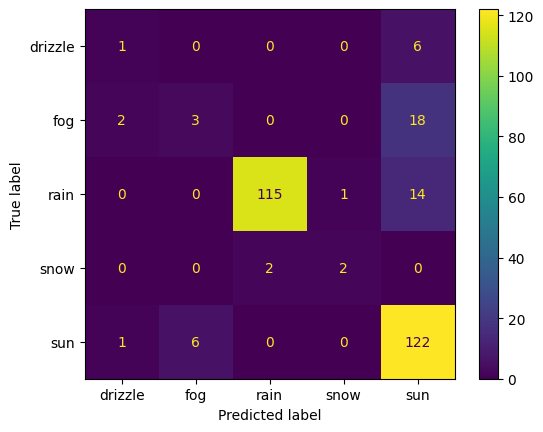

<Figure size 2400x1600 with 0 Axes>

In [38]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
print(classification_report(y_test, weather_pred), "\n")
plt.figure(figsize=(12,8), dpi=200)

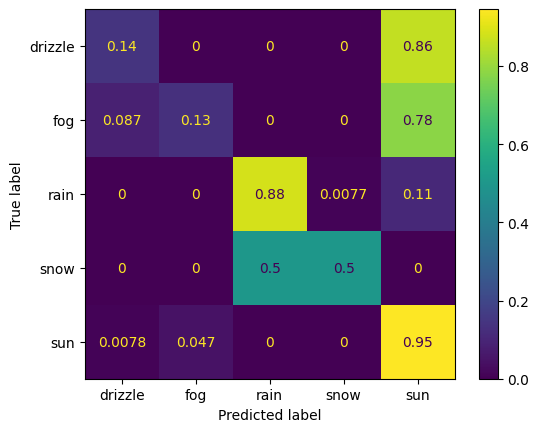

In [39]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, normalize="true")

In [40]:
## Obviously the data don't let algorithm to recognize whether it is fog or drizzle
## Let's make them out and try again, then.

In [41]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [42]:
new_df = df.drop(df[df['weather'].isin(["fog","drizzle"])].index,axis=0)

In [43]:
new_df.head()

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain


In [44]:
X = new_df.drop("weather" ,axis=1)
y = new_df["weather"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [45]:
random_forest = RandomForestClassifier()

In [46]:
grid = GridSearchCV(random_forest, parameters, error_score="raise")

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [48]:
weather_pred = grid.predict(X_test)

              precision    recall  f1-score   support

        rain       0.97      0.91      0.94       119
        snow       0.00      0.00      0.00         1
         sun       0.93      0.99      0.96       142

    accuracy                           0.95       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.94      0.95      0.94       262
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2400x1600 with 0 Axes>

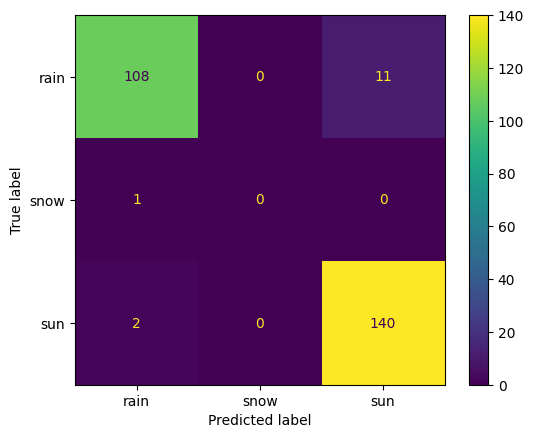

<Figure size 2400x1600 with 0 Axes>

In [49]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
print(classification_report(y_test, weather_pred), "\n")
plt.figure(figsize=(12,8), dpi=200)